<a href="https://colab.research.google.com/github/ajinkyajumde/Principal-Component-Analysis-on-bike-sharing-dataset/blob/main/PRINCIPAL_COMPONENT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction Using PCA on given dataset</u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Almabetter projects/Bike Sharing/SeoulBikeData.csv',encoding = 'unicode_escape')

### Data Inspection

Here we can clearly see what varibles we are dealing with in order to perform neccessary data analysis.


In [ ]:
# First look
dataset.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


As from the following information we can clearly see that there are no null values to deal with and so we can proceed further with outlier detection during the data preparation for regression model.


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
dataset.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


From the following step we can see that there are no duplicates in the dataset and so we can skip the de-duplication step and proceed further with our cleaning.

In [ ]:
# duplicate
len(dataset[dataset.duplicated()])

0

In [ ]:
dataset.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
dataset=dataset.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

As we have a date column in the given dataset, we import datetime module in order to segragate the date in terms of day, month and year. As we have data of only limited number of years, we can skip using year in our data analysis and focus the dependance only on month and day/date.

In [ ]:
from datetime import datetime
import datetime as dt

In [ ]:
# splitting "Date" column into three other columns like "year","month","day".
dataset['Date'] = dataset['Date'].apply(lambda x:dt.datetime.strptime(x,"%d/%m/%Y"))

In [ ]:
dataset['year'] = dataset['Date'].dt.year
dataset['month'] = dataset['Date'].dt.month
dataset['day'] = dataset['Date'].dt.day_name()

### Exploratory Data Analysis

[Text(0.5, 1.0, 'Count of Rented bikes acording to Month ')]

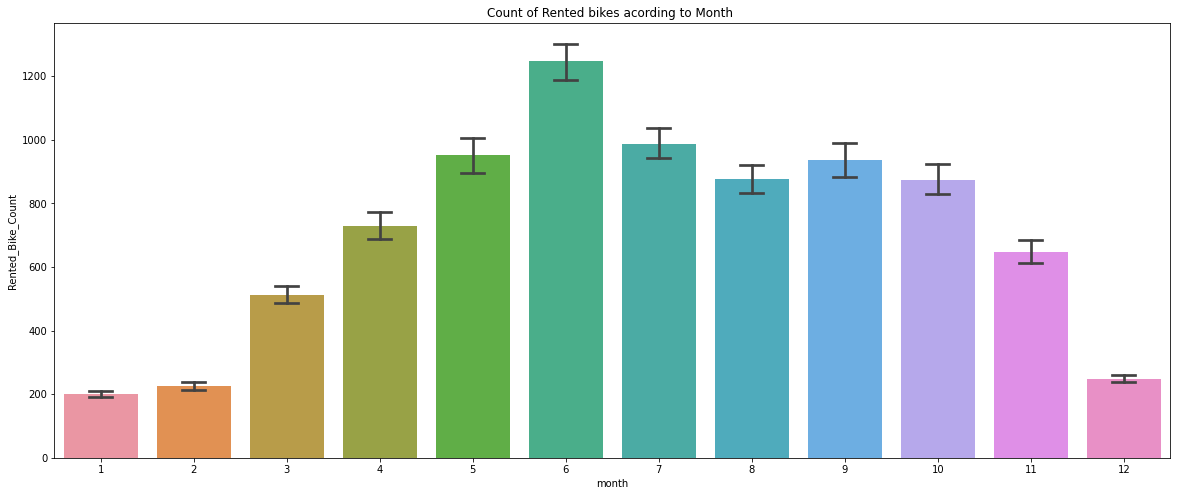

In [ ]:
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=dataset,x='month',y='Rented_Bike_Count',ax=ax,capsize=.25)
ax.set(title='Count of Rented bikes acording to Month ')

From the above braplot, we can conclude that the demand for rented bikes depends on the month of the year and so this becomes one of the import parameters in our analysis and regresssion model as well. The demand is at peak during the midyear.

[Text(0.5, 1.0, 'Count of Rented bikes acording to Hour ')]

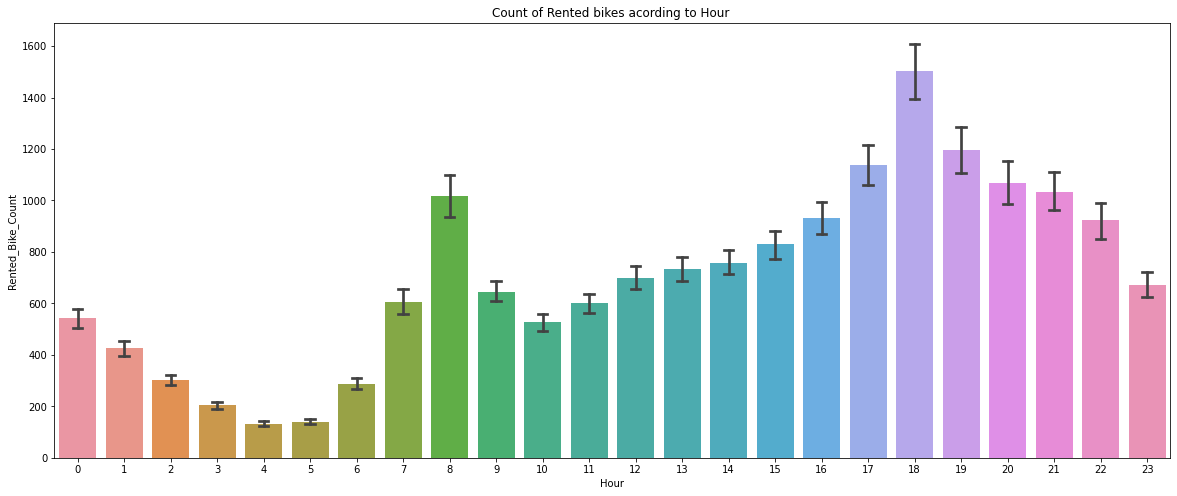

In [ ]:
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=dataset,x='Hour',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Hour ')

From the above braplot, we can conclude that the demand for rented bikes depends on the hour of the day and so this becomes one of the import parameters in our analysis and regresssion model as well. The demand is at peak during the working ours. 

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

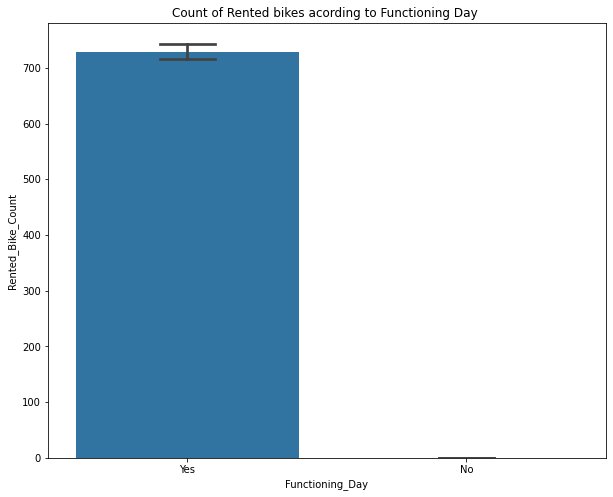

In [ ]:
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=dataset,x='Functioning_Day',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

The demand is only on functioning day and so we can conclude that the demand will remain lowest during the non functioning day.

[Text(0.5, 1.0, 'Count of Rented bikes acording to Seasons ')]

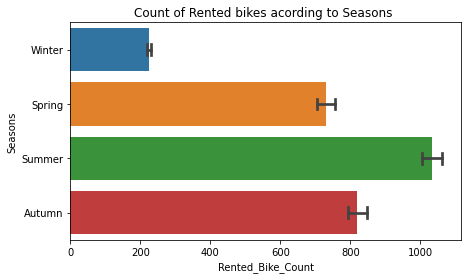

In [ ]:
fig,ax=plt.subplots(figsize=(7,4))
sns.barplot(data=dataset,x='Rented_Bike_Count',y='Seasons',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Seasons ')

From the above graph we analyze that the demand depends on the season we are in. There is quite less demand during the winter season.

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

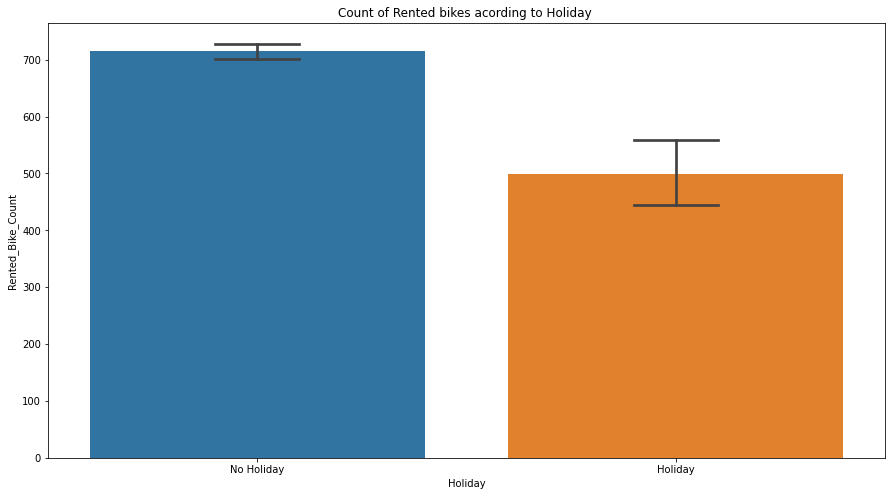

In [ ]:
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=dataset,x='Holiday',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Holiday ')

Based on the above analysis, we can conclude that the demand is quite higher on a working day as compared to holiday. And so we can also conclude that mostly the people working on working days are using the rented bikes for their use for office related work or other purpose.

In [ ]:
numerical_columns=list(dataset.describe())
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'year', 'month'],
      dtype='object')

In the above step we used .describe just to segregate the numerical feaatures form the dataset in order get the boxplots of the features using a for loop. 

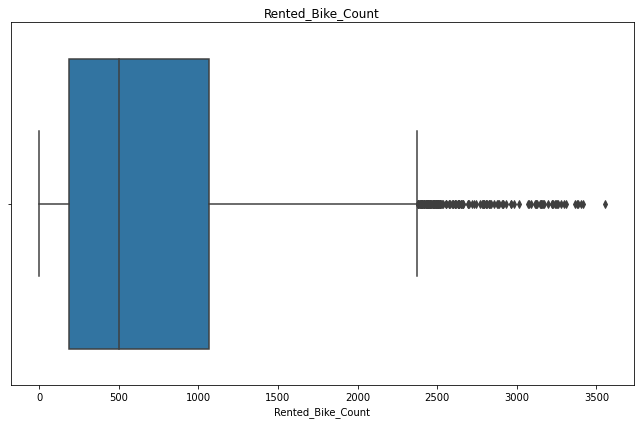

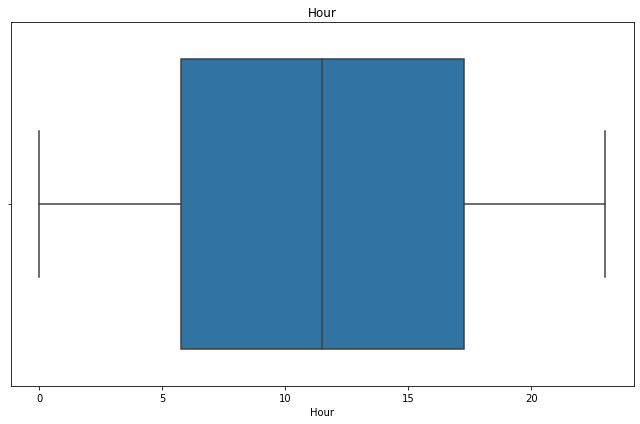

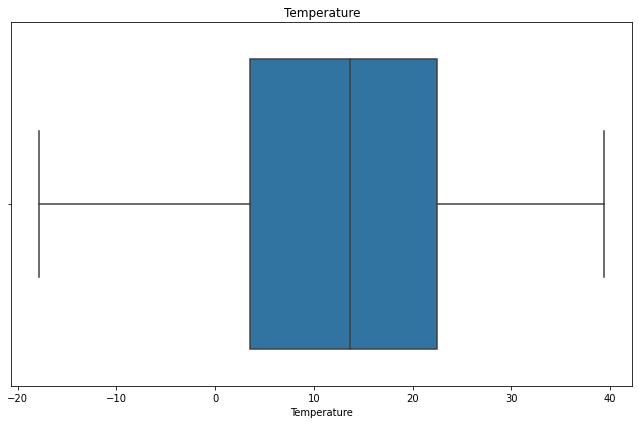

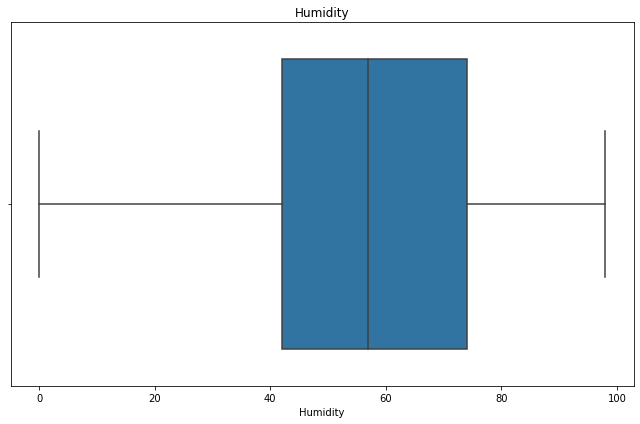

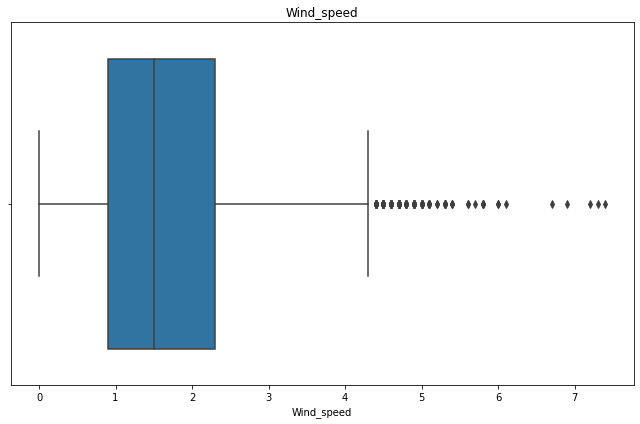

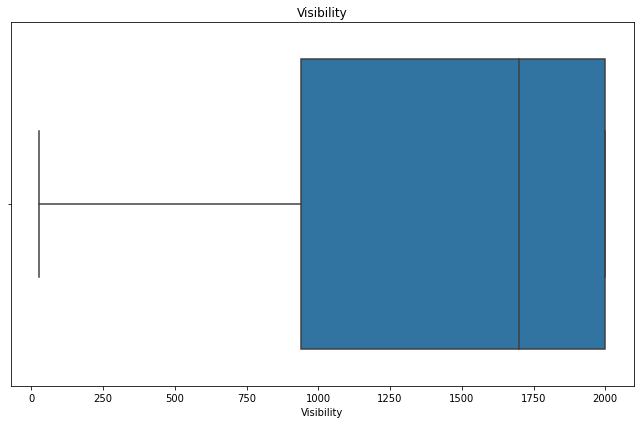

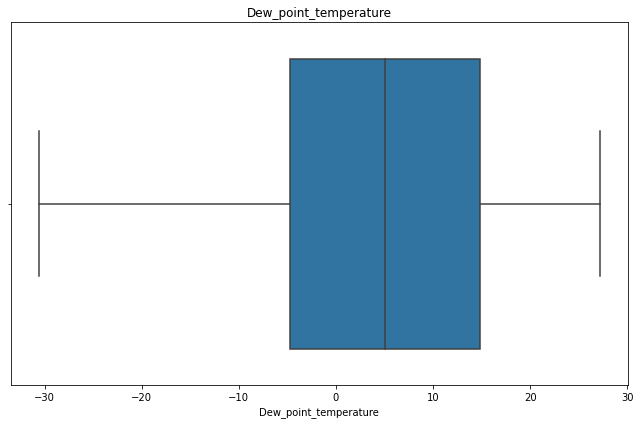

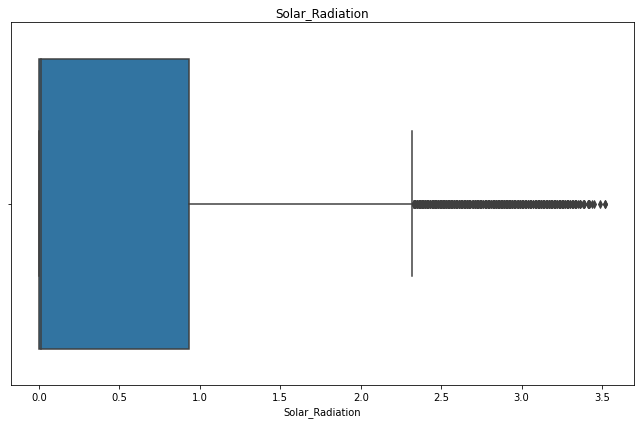

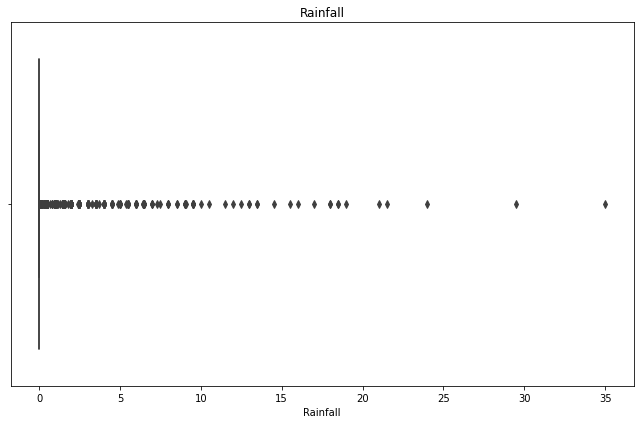

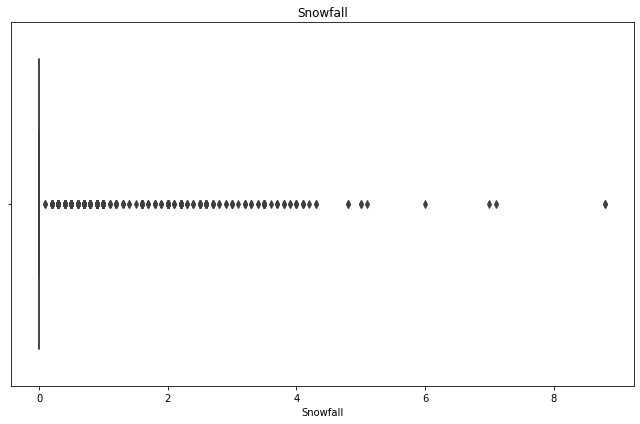

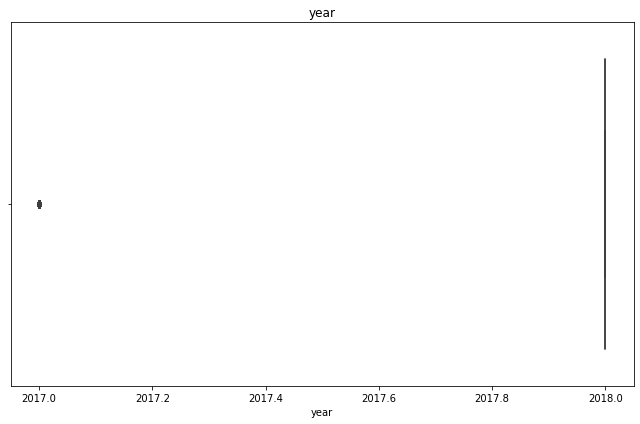

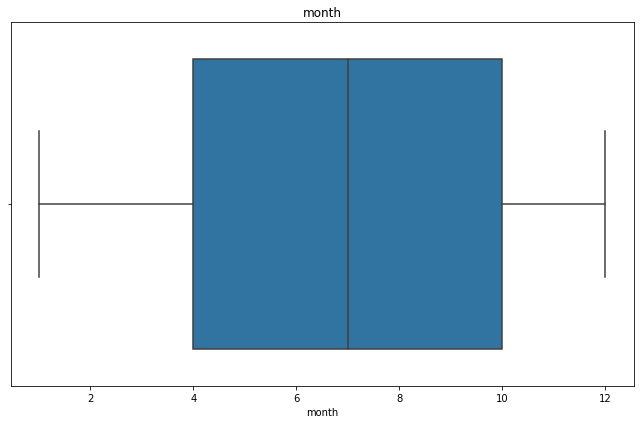

In [ ]:
for col in numerical_features:
  plt.figure(figsize=(9,6))
  sns.boxplot(x=dataset[col])
  
  plt.title(col)
  plt.tight_layout()
  

plt.show()

From the above boxplots firstly we conclude that our dependent varible is not evenly distributed and so we will proceed further after using proper function to noramlly distribute our dependent variable.
Secondly, we see some of the varibles having outliers and in order to enhance the regression model functionality, we try to reduce the effect of these outliers.
As in our real life, we use bikes during moderate showers for rainy and during moderate sunshine and snowfall, we try to filter out the outliers using the following steps.

In [ ]:
dataset.loc[dataset['Rainfall']>=4,'Rainfall']= 4
dataset.loc[dataset['Solar_Radiation']>=2.5,'Solar_Radiation']=2.5 
dataset.loc[dataset['Snowfall']>2,'Snowfall']= 2
dataset.loc[dataset['Wind_speed']>=4,'Wind_speed']= 4

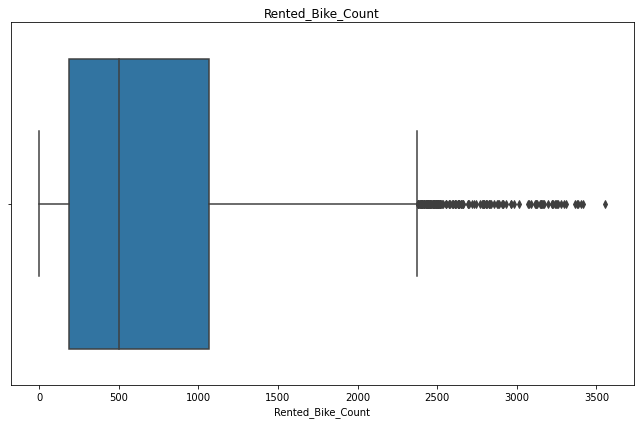

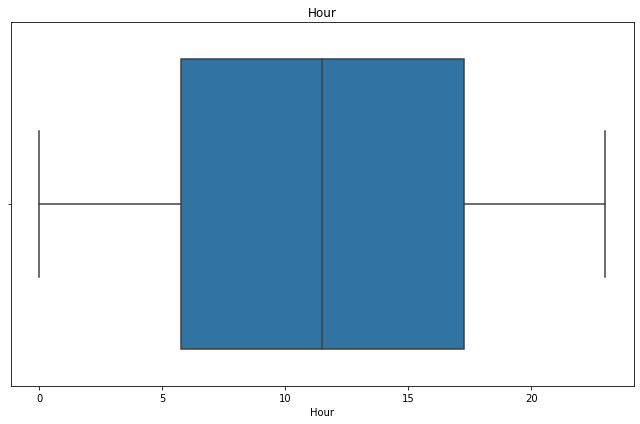

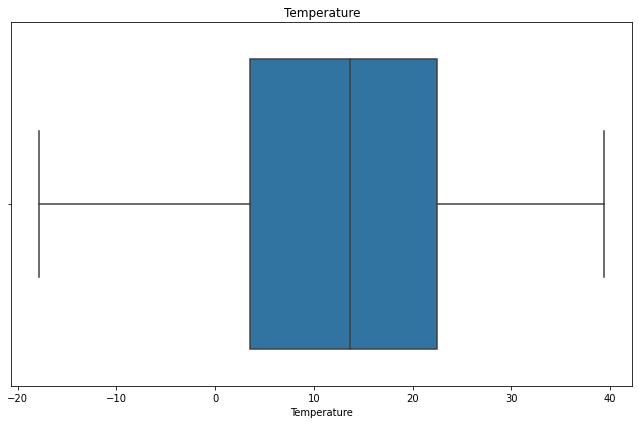

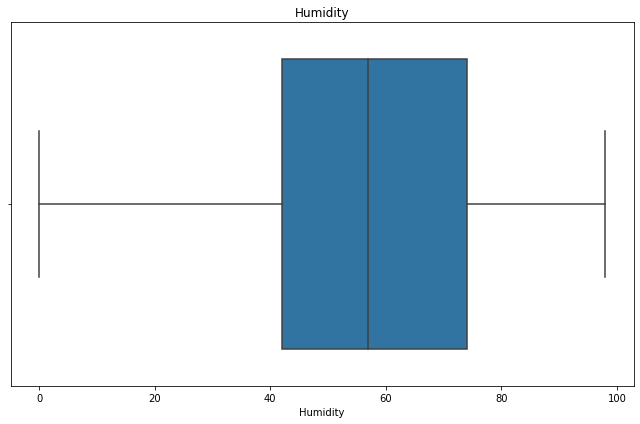

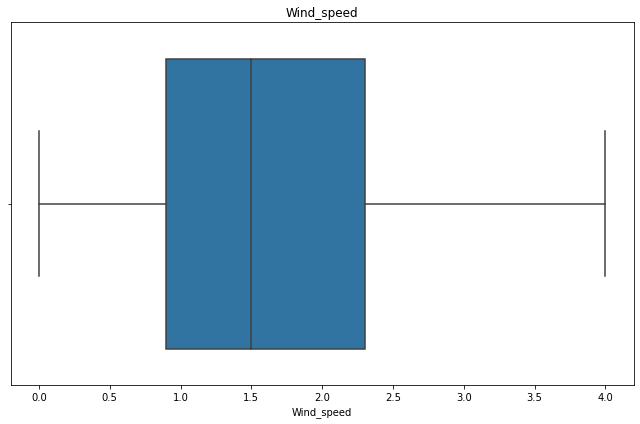

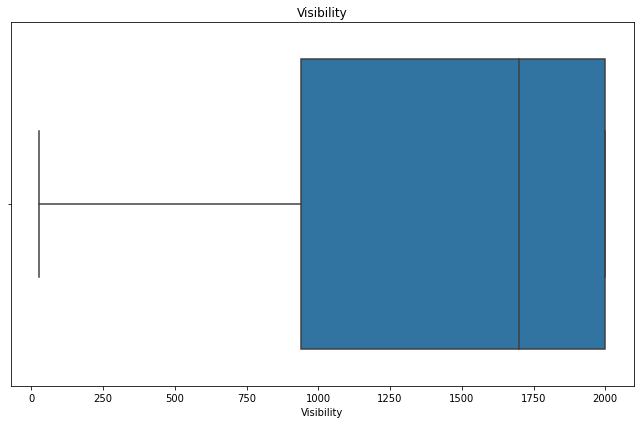

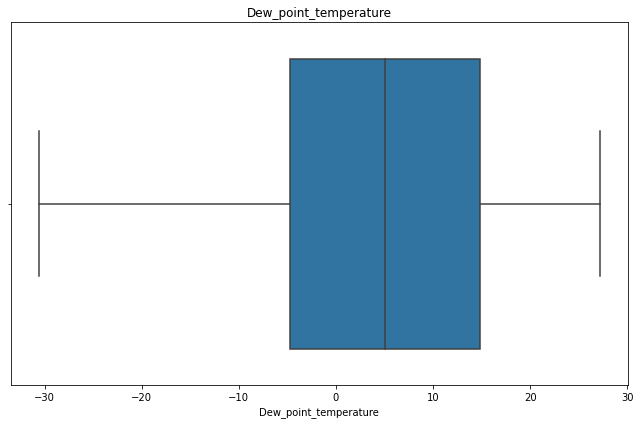

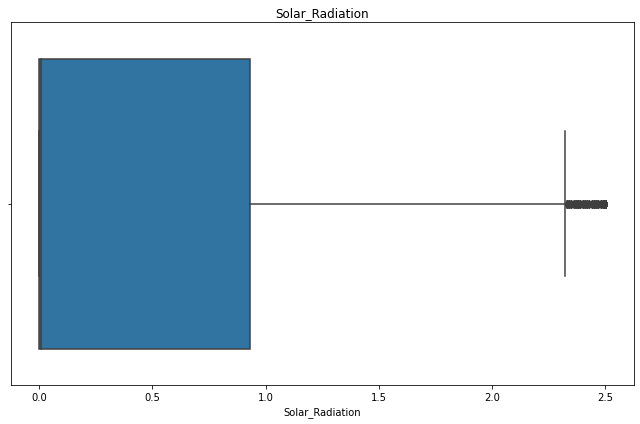

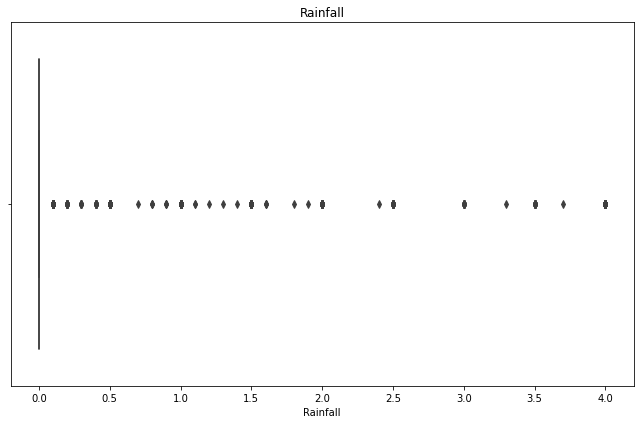

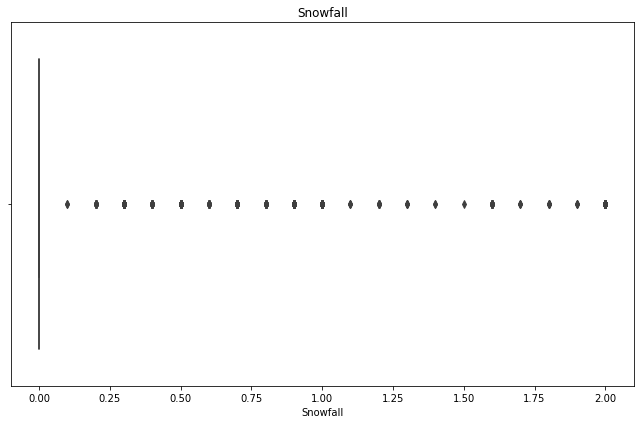

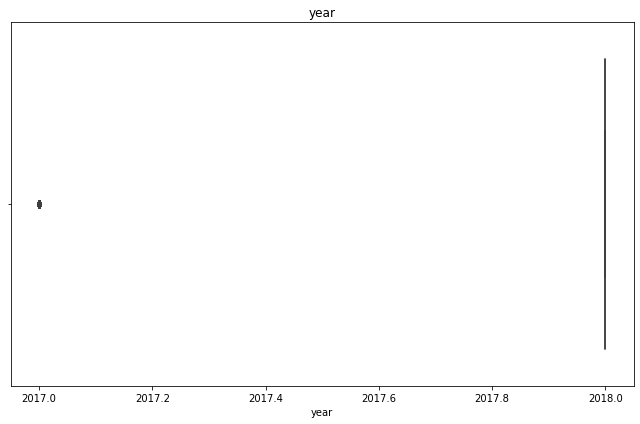

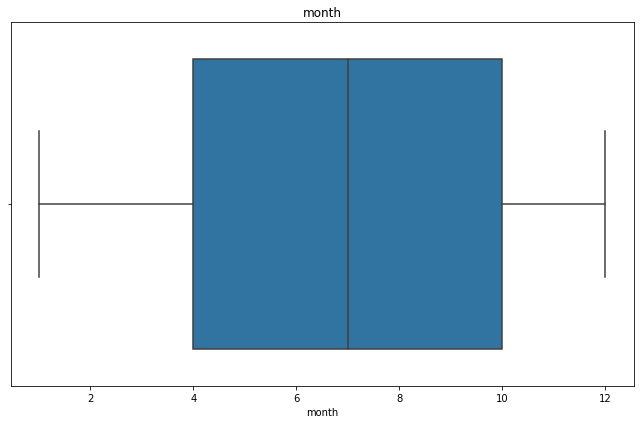

In [ ]:
for col in numerical_features:
  plt.figure(figsize=(9,6))
  sns.boxplot(x=dataset[col])
  
  plt.title(col)
  plt.tight_layout()
  

plt.show()

After outlier treatments we can clearly see that the above boxplots had minimal outliers.

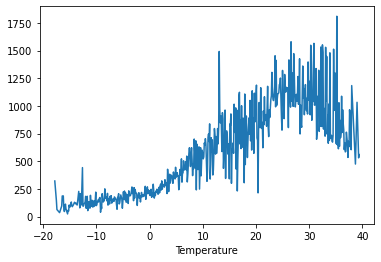

In [ ]:
dataset.groupby('Temperature').median()['Rented_Bike_Count'].plot()

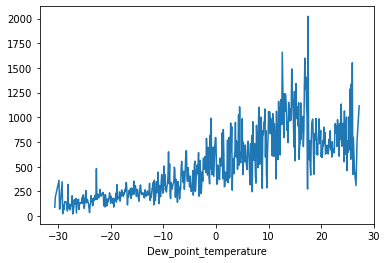

In [ ]:
dataset.groupby('Dew_point_temperature').median()['Rented_Bike_Count'].plot()

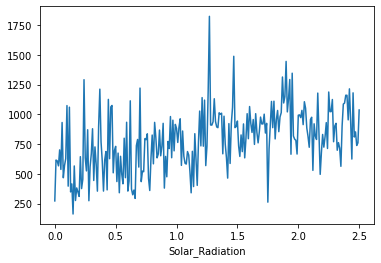

In [ ]:
dataset.groupby('Solar_Radiation').median()['Rented_Bike_Count'].plot()

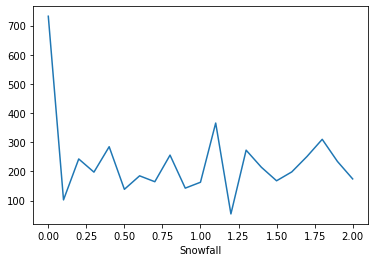

In [ ]:
dataset.groupby('Snowfall').mean()['Rented_Bike_Count'].plot()

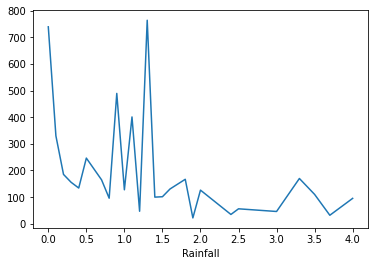

In [ ]:
dataset.groupby('Rainfall').mean()['Rented_Bike_Count'].plot()

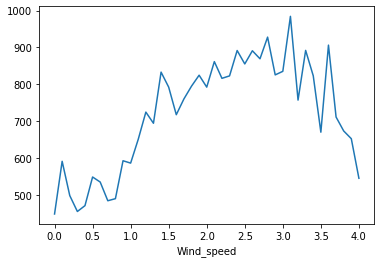

In [ ]:
dataset.groupby('Wind_speed').mean()['Rented_Bike_Count'].plot()

We can see the effect of the numeric features on our dependent variable ie rented bike count. We can conclude that these features have large effect while predicting the dependent varible in our model.

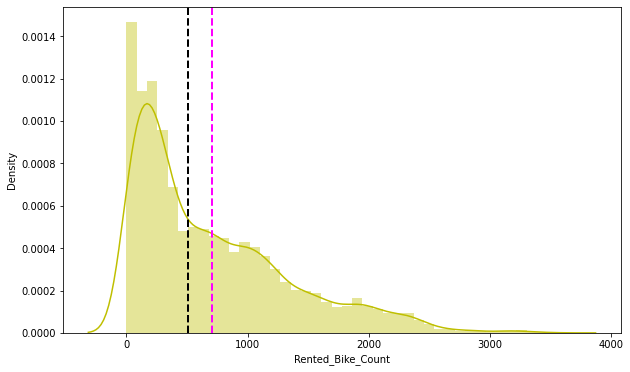

In [ ]:
plt.figure(figsize=(10,6))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')
ax=sns.distplot(dataset['Rented_Bike_Count'],hist=True ,color="y")
ax.axvline(dataset['Rented_Bike_Count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(dataset['Rented_Bike_Count'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

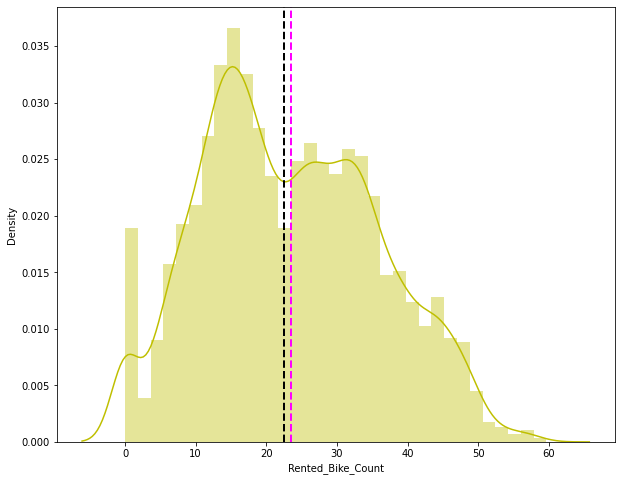

In [ ]:
plt.figure(figsize=(10,8))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(dataset['Rented_Bike_Count']), color="y")
ax.axvline(np.sqrt(dataset['Rented_Bike_Count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(dataset['Rented_Bike_Count']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()

In order to normally distribute the positively skewed distribution of our dependent variable, we used square root function and tried to improve the distribution of our varible. After ensuring the proper distribution we can proceed further with our analysis of correaltion.

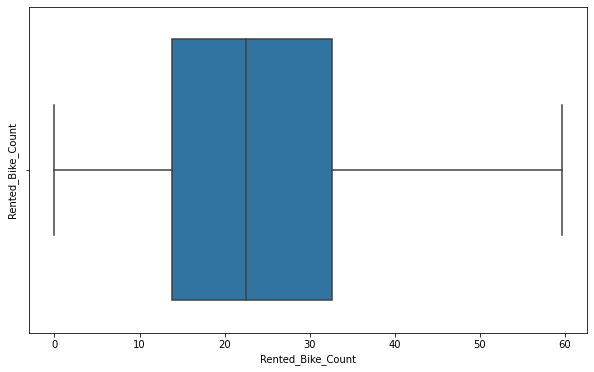

In [ ]:
plt.figure(figsize=(10,6))

plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=np.sqrt(dataset['Rented_Bike_Count']))
plt.show()

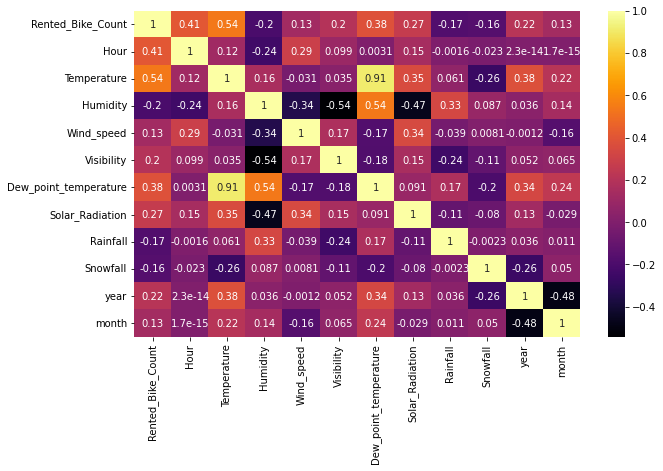

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(dataset.corr(),cmap='inferno',annot=True)

In [ ]:
dataset=dataset.drop(['Dew_point_temperature'],axis=1)

As we can see there are some Highly collinear features in the dataset. We remove one of them by simply dropping the feature from the dataset. In our case we drop dew point temprature which is highly collinear with temparature feature.
As we have some negatively correlated features as well, we simply remove them as well.

In [ ]:
dataset=dataset.drop(['Snowfall'],axis=1)
dataset=dataset.drop(['Visibility'],axis=1)

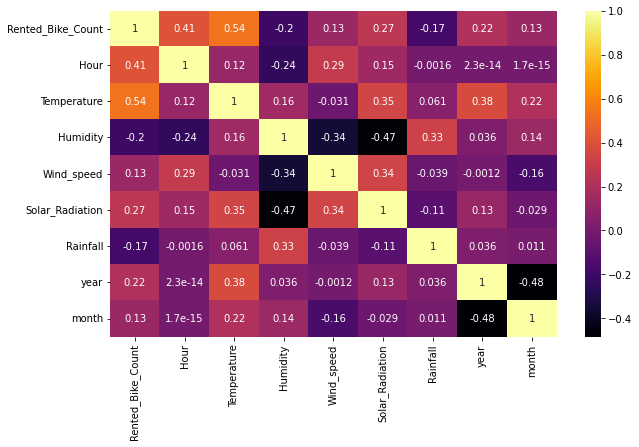

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(dataset.corr(),cmap='inferno',annot=True)

In [ ]:
import statsmodels.api as sm
X = dataset[[ 'Temperature','Humidity',
       'Wind_speed',
       'Solar_Radiation', 'Rainfall']]
Y = dataset['Rented_Bike_Count']
dataset.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Solar_Radiation,Rainfall,Seasons,Holiday,Functioning_Day,year,month,day
0,2017-12-01,254,0,-5.2,37,2.2,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday
1,2017-12-01,204,1,-5.5,38,0.8,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday
2,2017-12-01,173,2,-6.0,39,1.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday
3,2017-12-01,107,3,-6.2,40,0.9,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday
4,2017-12-01,78,4,-6.0,36,2.3,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday


We define X and Y as for independent and dependent features respectively for our model fitting.

We add a constant column with value 1 for B0 value that is intersection point in our model whicch will contribute to introducce bias in our model equation.

In [ ]:
X.corr()

,Temperature,Humidity,Wind_speed,Solar_Radiation,Rainfall
Temperature,1.000000,0.159371,-0.031368,0.350679,0.061274
Humidity,0.159371,1.000000,-0.341432,-0.467236,0.331631
Wind_speed,-0.031368,-0.341432,1.000000,0.342995,-0.038813
Solar_Radiation,0.350679,-0.467236,0.342995,1.000000,-0.105920
Rainfall,0.061274,0.331631,-0.038813,-0.105920,1.000000


In [ ]:
dataset['day']=dataset.apply((lambda x : 0 if x['day']=='Sunday' or x['day']=='Saturday' else 1),axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['Rented_Bike_Count']]])

,variables,VIF
0,Hour,4.416218
1,Temperature,3.168371
2,Humidity,16.663341
3,Wind_speed,5.211289
4,Solar_Radiation,2.627421
5,Rainfall,1.182058
6,year,31.007773
7,month,4.958634
8,day,3.514723


In [ ]:
dataset=dataset.drop(['year'],axis=1)

In [ ]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['Rented_Bike_Count']]])

,variables,VIF
0,Hour,3.869052
1,Temperature,3.060365
2,Humidity,6.928384
3,Wind_speed,4.498611
4,Solar_Radiation,2.309673
5,Rainfall,1.126270
6,month,4.458474
7,day,3.264249


In [ ]:
dataset=pd.get_dummies(dataset, columns=['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'month'], prefix=['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'month'])

We added dummies in our dataset as these are the variables with multiple values and higher significance.

In [ ]:
dataset=dataset.drop(['Date'],axis=1)

In [ ]:
dataset

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Solar_Radiation,Rainfall,day,Hour_0,Hour_1,Hour_2,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,254,-5.2,37,2.2,0.0,0.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,204,-5.5,38,0.8,0.0,0.0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,173,-6.0,39,1.0,0.0,0.0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,107,-6.2,40,0.9,0.0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,78,-6.0,36,2.3,0.0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,4.2,34,2.6,0.0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8756,764,3.4,37,2.3,0.0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8757,694,2.6,39,0.3,0.0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8758,712,2.1,41,1.0,0.0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


The high VIF values for dummies can be ignored but for other varibles it is well within range.

In [ ]:
X = dataset.drop(columns=['Rented_Bike_Count'], axis=1)
y = np.sqrt(dataset['Rented_Bike_Count'])

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
#Apply Standard Scaling
sc=StandardScaler()  
X=sc.fit_transform(X) 
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-1.513957,-1.042483,0.501282,-0.674512,-0.18972,0.631243,4.795832,-0.208514,-0.208514,-0.208514,...,-0.304655,-0.299253,-0.304655,-0.299253,-0.304655,-0.304655,-0.299253,-0.304655,-0.299253,3.282407
1,-1.539074,-0.993370,-0.920716,-0.674512,-0.18972,0.631243,-0.208514,4.795832,-0.208514,-0.208514,...,-0.304655,-0.299253,-0.304655,-0.299253,-0.304655,-0.304655,-0.299253,-0.304655,-0.299253,3.282407
2,-1.580936,-0.944257,-0.717573,-0.674512,-0.18972,0.631243,-0.208514,-0.208514,4.795832,-0.208514,...,-0.304655,-0.299253,-0.304655,-0.299253,-0.304655,-0.304655,-0.299253,-0.304655,-0.299253,3.282407
3,-1.597680,-0.895144,-0.819145,-0.674512,-0.18972,0.631243,-0.208514,-0.208514,-0.208514,4.795832,...,-0.304655,-0.299253,-0.304655,-0.299253,-0.304655,-0.304655,-0.299253,-0.304655,-0.299253,3.282407
4,-1.580936,-1.091596,0.602854,-0.674512,-0.18972,0.631243,-0.208514,-0.208514,-0.208514,-0.208514,...,-0.304655,-0.299253,-0.304655,-0.299253,-0.304655,-0.304655,-0.299253,-0.304655,-0.299253,3.282407


In [ ]:
pca=PCA(.95)  
pca.fit(X)  
print('Number of components to explain 95% Variance is',pca.n_components_)

Number of components to explain 95% Variance is 37


In [ ]:
#Define two components  
pca=PCA(n_components=37) 
principalComponents=pca.fit_transform(X) 
principalDf=pd.DataFrame(data=principalComponents) 
principalDf.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,3.002808,-0.624560,-0.931839,-0.495729,-0.411686,0.588772,-0.031100,0.144440,0.470254,1.102968,...,-1.777103,-1.093322,-0.456443,-0.288129,-0.108610,1.576246,1.233047,-1.320222,-1.661422,-0.045474
1,2.917372,-0.387422,-1.474673,-0.257807,-0.345630,0.451617,0.725111,-0.551256,0.780350,0.658406,...,-0.297431,-0.960857,-1.617586,-0.214057,-0.811771,-0.005912,-0.094845,1.280269,-0.595021,0.723728
2,2.941467,-0.402497,-1.462271,-0.247567,-0.341388,0.468779,0.850357,-0.276530,0.618420,0.856485,...,-0.341124,2.374946,-0.755187,0.991443,0.335047,-0.120945,0.224141,-1.154852,-0.710256,0.153325
3,2.933884,-0.376333,-1.540917,-0.200082,-0.322973,0.466738,1.029988,0.147483,0.383972,1.168880,...,1.873374,-0.074366,-1.249426,-1.160652,0.265505,-0.313709,0.412892,-0.767313,-1.128029,-0.859505
4,3.053072,-0.608533,-0.993377,-0.448282,-0.404809,0.573807,0.509961,0.030626,0.404474,1.087672,...,-0.747426,0.971539,1.686444,-0.402823,-0.074875,0.918118,-0.099852,2.740252,-1.245696,-0.139201


In [ ]:
pca.explained_variance_ratio_

array([0.06913252, 0.05703271, 0.05123993, 0.04839921, 0.0399586 ,
       0.03237352, 0.02487593, 0.02326275, 0.02259302, 0.02212381,
       0.02184874, 0.0218243 , 0.02178572, 0.02169261, 0.02142065,
       0.02108013, 0.0208856 , 0.02086981, 0.02086957, 0.02086957,
       0.02086957, 0.02086957, 0.02086957, 0.02086957, 0.02086957,
       0.02086957, 0.02086957, 0.02086957, 0.02086957, 0.02086957,
       0.02086957, 0.02086957, 0.02086957, 0.02086957, 0.02086957,
       0.02086809, 0.01962654])

In [ ]:
X=principalDf
y = np.sqrt(dataset['Rented_Bike_Count'])

In [ ]:
#add a constant column
X = sm.add_constant(X)
X

,const,0,1,2,3,4,5,6,7,8,...,27,28,29,30,31,32,33,34,35,36
0,1.0,3.002808,-0.624560,-0.931839,-0.495729,-0.411686,0.588772,-0.031100,0.144440,0.470254,...,-1.777103,-1.093322,-0.456443,-0.288129,-0.108610,1.576246,1.233047,-1.320222,-1.661422,-0.045474
1,1.0,2.917372,-0.387422,-1.474673,-0.257807,-0.345630,0.451617,0.725111,-0.551256,0.780350,...,-0.297431,-0.960857,-1.617586,-0.214057,-0.811771,-0.005912,-0.094845,1.280269,-0.595021,0.723728
2,1.0,2.941467,-0.402497,-1.462271,-0.247567,-0.341388,0.468779,0.850357,-0.276530,0.618420,...,-0.341124,2.374946,-0.755187,0.991443,0.335047,-0.120945,0.224141,-1.154852,-0.710256,0.153325
3,1.0,2.933884,-0.376333,-1.540917,-0.200082,-0.322973,0.466738,1.029988,0.147483,0.383972,...,1.873374,-0.074366,-1.249426,-1.160652,0.265505,-0.313709,0.412892,-0.767313,-1.128029,-0.859505
4,1.0,3.053072,-0.608533,-0.993377,-0.448282,-0.404809,0.573807,0.509961,0.030626,0.404474,...,-0.747426,0.971539,1.686444,-0.402823,-0.074875,0.918118,-0.099852,2.740252,-1.245696,-0.139201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1.0,0.604834,1.814095,0.422972,-0.395822,-1.392640,-1.512752,-2.299294,-0.542866,-0.938140,...,0.029268,-1.573224,-0.447867,0.253515,2.322152,-0.992545,0.361618,0.297775,0.138347,0.385522
8756,1.0,0.605395,1.910933,0.139982,-0.238541,-1.346129,-1.529595,-2.013060,-0.651559,-0.936750,...,-0.529471,0.525065,-0.017386,1.291897,1.882583,0.173118,0.284329,-0.098921,0.423059,0.315704
8757,1.0,0.491396,2.251848,-0.660190,0.127513,-1.238932,-1.701411,-0.944002,-0.808273,-0.914230,...,0.454604,1.652486,0.662857,0.410275,-0.124256,-0.338673,-1.376915,-0.120738,0.849956,-0.439118
8758,1.0,0.543471,2.175352,-0.516932,0.082809,-1.253287,-1.660652,-0.878463,-1.204076,-0.760025,...,0.239925,-1.700748,2.641362,0.160921,-1.104836,-0.129663,0.716560,-0.668909,1.648009,0.623349


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)

(7008, 38)
(1752, 38)


In [ ]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, y_train)

In [ ]:
reg.score(X_train, y_train)

0.7462531987822307

In [ ]:
reg.score(X_test, y_test)

0.7466761813976719

In [ ]:

y_pred_test=reg.predict(X_test)

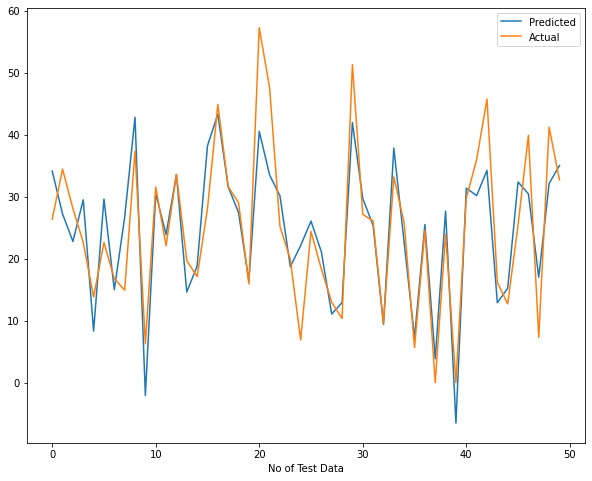

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(y_pred_test[0:50])
plt.plot(np.array(y_test[0:50]))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# define model
model_grad = GradientBoostingRegressor()
# fit model
model_grad.fit(X_train, y_train)

GradientBoostingRegressor()

In [ ]:

y_pred_test_grad=model_grad.predict(X_test)

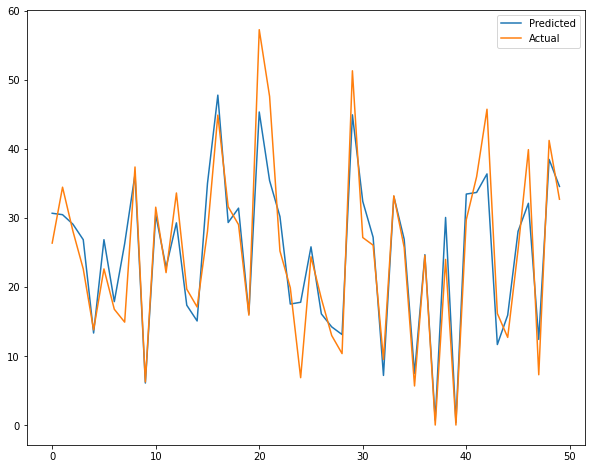

In [ ]:
#Plot the figure
plt.figure(figsize=(10,8))
plt.plot((y_pred_test_grad[0:50]))
plt.plot((np.array(y_test[0:50])))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
model_grad.score(X_train, y_train)

0.872993691381639